In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from plot_config import *
from utils import *

In [2]:
from matplotlib.gridspec import GridSpec

In [3]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)

t = rtime[1:]

In [4]:
salty_date = rtime[salty_idate]
fresh_date = rtime[fresh_idate]

In [5]:
def terms_from_file(filename):
    termds = xr.open_zarr(filename)
    terms = {}
    for var in termds.data_vars:
        terms[var] = np.array(termds[var])
    return terms

In [6]:
terms4 = terms_from_file('lineplotprep/contr_domain4')
slast4 = np.load('lineplotprep/contr_slast_domain4.npy')
sfirst4 = np.load('lineplotprep/contr_sfirst_domain4.npy')
sums4 = np.load('lineplotprep/contr_sums_domain4.npy')

termsa = terms_from_file('lineplotprep/contr_domain_all')
slasta = np.load('lineplotprep/contr_slast_domain_all.npy')
sfirsta = np.load('lineplotprep/contr_sfirst_domain_all.npy')
sumsa = np.load('lineplotprep/contr_sums_domain_all.npy')

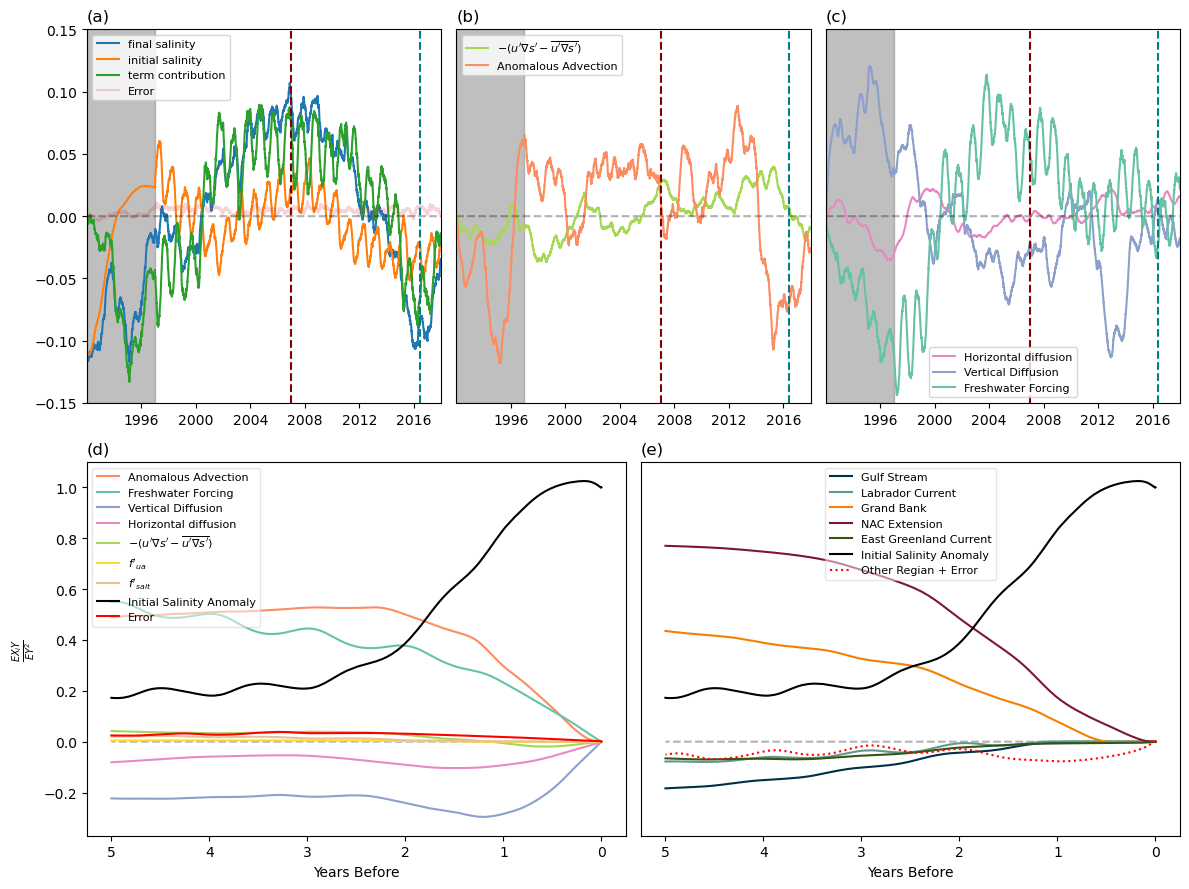

In [23]:
ttt = rtime
fig = plt.figure(figsize=(12, 9))
gs = GridSpec(2, 6)
axs = [fig.add_subplot(gs[0,i*2:(i+1)*2]) for i in range(3)]
fontsize = 8

ylim = 0.15
small_ylim = 0.01
ylimm = (-0.37,1.1)

axs[0].plot(t,slasta,label = 'final salinity')
axs[0].plot(t,sfirsta, label = 'initial salinity')
axs[0].plot(t,-sumsa[1:]/NUMBER_OF_PARTICLE_domain_all, label = 'term contribution')
axs[0].plot(t,slasta-sfirsta+sumsa[1:]/NUMBER_OF_PARTICLE_domain_all,label = 'Error',alpha = 0.2)
axs[0].legend(fontsize = fontsize)
axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
axs[0].set_ylim([-ylim,ylim])
axs[0].set_xlim([t[0],t[-1]])
axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

for i,group in enumerate([['E','A'],['dif_h','dif_v','F']]):
    for var in group:
        axs[i+1].plot(ttt, -termsa[var]/NUMBER_OF_PARTICLE_domain_all,label = term_dic[var],color = color_dic[var])
    axs[i+1].legend(fontsize = fontsize)
    # if i!=2:
    axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],**fill_betweenx_kwarg)
    axs[i+1].set_ylim([-ylim,ylim])
    axs[i+1].set_xlim([t[0],t[-1]])
    axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
    axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

for i in range(3):
    axs[i].set_title('('+chr(97+i)+')',x = subnum_offset,loc = 'left')
    axs[i].plot(t,np.zeros(len(t)),'k--',alpha = 0.3)
    if i>0:
        axs[i].set_yticks([])


ax1 = fig.add_subplot(gs[1,:3])
ax2 = fig.add_subplot(gs[1,3:])
for ax in [ax1,ax2]:
    ax.plot(xs,np.zeros(len(xs)),'k--',alpha = 0.3)
name, (save1,save2) = ('domain_all',('figure10(c).png', 'figure10(d).png'))
NUMBER_OF_PARTICLE = NUMBER_OF_PARTICLE_domain_all
the_covs = xr.open_zarr('lineplotprep/dense_covdata_'+name)
covs = {}
for var in the_covs.data_vars:
    covs[var]= np.array(the_covs[var])

bins = 1
n = 9497
m = 1825#len(ds.space)
size = (n//bins, m//bins)

xs = np.arange(0,size[1]*1+1,1)/365
for var in rhs_list+['sf']:
    if var == 'sf':
        ax1.plot(xs,[1]+list(covs[var]),label = 'Initial Salinity Anomaly',color = 'k')
    else:
        ax1.plot(xs,[0]+list(-covs[var]/NUMBER_OF_PARTICLE),label = term_dic[var],color = color_dic[var])
ax1.plot(xs,[0]+list(1-covs['sf']-(-covs['sum'])/NUMBER_OF_PARTICLE),color = error_color, label = 'Error')
ax1.invert_xaxis()
ax1.set_ylim(*ylimm)
ax1.set_xlabel('Years Before')
ax1.set_ylabel(r'$\frac{EX_iY}{EY^2}$')
ax1.legend(fontsize = fontsize,loc = 'upper left',framealpha=0.5)
ax1.set_title('(d)',x = subnum_offset,loc = 'left')
# plt.savefig(save1)

total = np.zeros(len(covs['A'])+1)
for var in region_names+['sf']:
    if var == 'sf':
        thing = np.array([1]+list(covs[var]))
        ax2.plot(xs,thing,label = 'Initial Salinity Anomaly',color = 'k')
    else:
        thing = np.array([0]+list(-covs[var]/NUMBER_OF_PARTICLE))
        ax2.plot(xs,thing,label = region_longnames[var],color = region_colors[var])
    total+=thing
ax2.plot(xs,1-total,color = 'r',ls = ':', label = 'Other Regian + Error')
ax2.invert_xaxis()
ax2.set_ylim(*ylimm)
ax2.set_xlabel('Years Before')
# ax2.set_ylabel(r'$\frac{EX_iY}{EY^2}$')
ax2.set_yticks([])
ax2.legend(fontsize = fontsize,framealpha=0.5)
ax2.set_title('(e)',x = subnum_offset,loc = 'left')

plt.tight_layout()
plt.savefig('ng_fig4.pdf', format="pdf",dpi = 300)

In [8]:
subnum_offset = -0.0